# Functions to run a random walker



In [2]:
import numpy as np
import random

# Random walker
def run_random_walker(world, position, history, steps):
    N1 = world.shape[0]
    N2 = world.shape[1]
    (i,j) = position
    for k in range(steps): #for every step
        for i in np.arange(0, N1, 1):
          for j in np.arange(0, N2, 1):
            world[position] = 0.67
            (i,j) = position
            die = random.uniform(0, 1)
            if die<0.5: #bottom step
              world[position] = 1
            history.append(position)

    return (world,position,history)

# Biased random walker
def run_biased_random_walker(world, position, history, steps):
    N1 = world.shape[0]
    N2 = world.shape[1]
    (i,j) = position
    for k in range(steps): #for every step
        world[position] = 0.67
        (i,j) = position
        die = random.uniform(0, 1)
        if die<0.3: #right step
          position = (i,(j+1)%N2)
        elif die<0.6: #bottom step
          position = ((i-1)%N1,j)
        elif die<0.8: #left step
          position = (i,(j-1)%N2)
        else: #top step
          position = ((i+1)%N1,j)
        world[position] = 1
        history.append(position)

    return (world,position,history)

**Main code to run and plot the random walk**

MemoryError: 

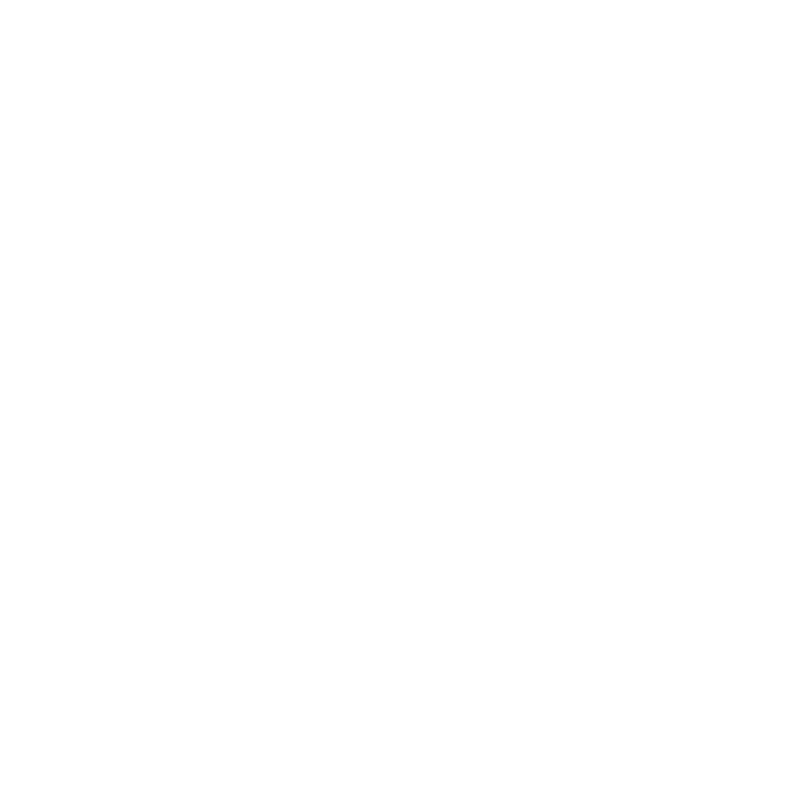

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm

from IPython import display
from time import sleep

# Parameters
N1, N2 = 1024, 1024 #height, width
steps, dt = 200000, 200000 #steps to walk, plot at each dt
world = np.zeros((N1,N2)) #initial conditions of zero
world[N1//2,N2//2] = 1 #initial conditions
position = (N1//2,N2//2)
history = []

# Plot everything slowly, one generation at a time
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylim(0,N1)
ax.set_xlim(0,N2)
plt.axis('off')
ax.set_aspect('equal')
for step in range(steps//dt):
    (world,position,history) = run_random_walker(world,position,history,dt) #run model
    plt.imshow((world), cmap=plt.get_cmap(cm.bone), origin = 'lower')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.025) #plot slower, useful if not using colab.

# Add label
ax.text(2, N1+5, f'Unbiased random walk of length {dt*(steps//dt)}', color='Orange', fontsize=20)
plt.show()

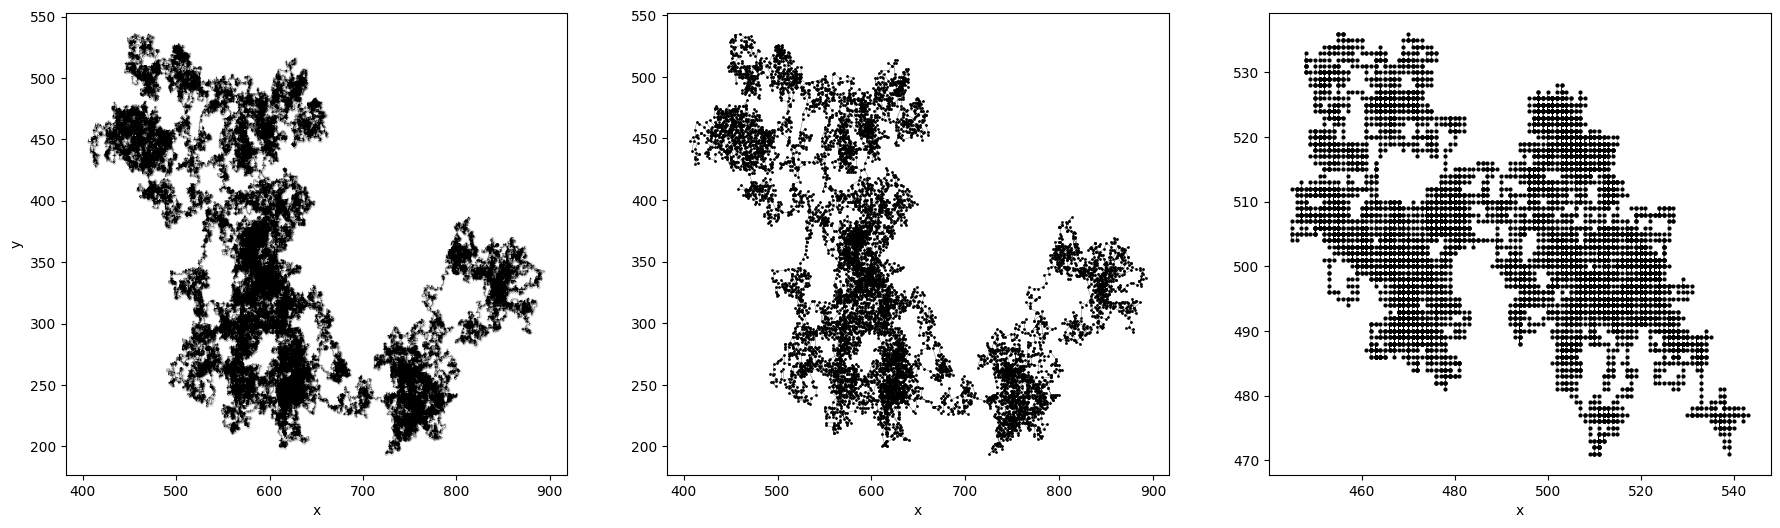

In [ ]:
coarse_graining = 20
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(22,6))
y,x = map(np.array, zip(*history))
length=len(x)
ax1.plot(x, y, '-o', color='black', ms=0.05, lw=0.2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.plot(x[::coarse_graining], y[::coarse_graining], '-o', color='black', ms=1, lw=0.2)
ax2.set_xlabel('x')
ax3.plot(x[:length//coarse_graining], y[:length//coarse_graining], '-o', color='black', ms=2, lw=0.2)
ax3.set_xlabel('x')
plt.show()

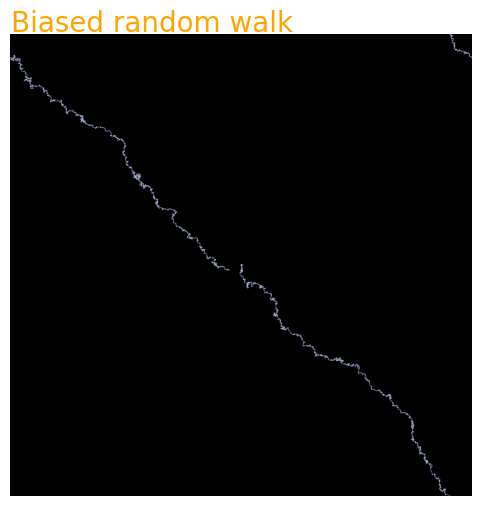

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

from IPython import display
from time import sleep

# Parameters
N1, N2 = 1024, 1024 #height, width
steps, dt = 10000, 10000 #steps to walk, plot at each dt
world = np.zeros((N1,N2)) #initial conditions of zero
world[N1//2,N2//2] = 1 #initial conditions
position = (N1//2,N2//2)
history = []

# Plot everything slowly, one generation at a time
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_ylim(0,N1)
ax.set_xlim(0,N2)
plt.axis('off')
ax.set_aspect('equal')
for step in range(steps//dt):
    (world,position,history) = run_biased_random_walker(world,position,history,dt) #run model
    plt.imshow((world), cmap=plt.get_cmap(cm.bone), origin = 'lower')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.025) #plot slower, useful if not using colab.

# Add label
ax.text(2, N1+5, f'Biased random walk', color='Orange', fontsize=20)
plt.show()

# Functions to perform percolation



In [7]:
import numpy as np
import random

# Site percolation
def run_percolation(world, probability):
    N1 = world.shape[0]
    N2 = world.shape[1]
    for i in range(N1): #for cell in every row
        for j in range(N2): #and every column
            die = random.uniform(0, 1)
            # world[(i,j)] = world[(i,j)] or (die < probability)
            if die < probability:
              world[(i,j)] = 1
            else:
              world[(i,j)] = 0

    return (world)

In [8]:
import time
# displays the current state of green_world cells
def display_world(world):
    plt.imshow(np.flipud(world), cmap=plt.get_cmap(cm.ocean))
    display.display(plt.gcf())
    display.clear_output(wait=True)

**Main code to run and plot the random walk**

0.4 Largest cluster 4476.0
Percent of Greenspace to Total Land: 0.273193359375


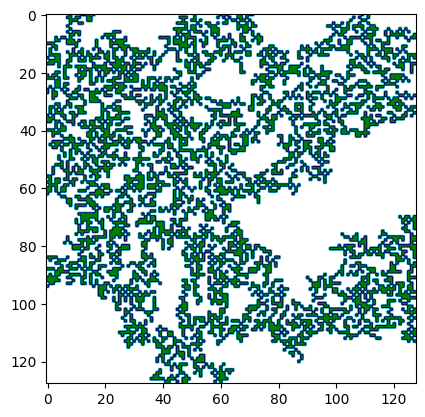

In [12]:
import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib import cm

from IPython import display
from time import sleep

def find_largest_cluster(world,structure, p):
    # Set up the figure
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    # ax1.set_ylim(0,N1)
    # ax1.set_xlim(0,N2)
    # ax2.set_ylim(0,N1)
    # ax2.set_xlim(0,N2)
    # ax1.set_aspect('equal')
    # ax2.set_aspect('equal')

   
    label_world, nb_labels = ndimage.label(world,structure) #label clusters
    sizes = ndimage.sum(world, label_world, range(nb_labels + 1)) # Get sizes of clusters

    

    mask_largest_cluster = sizes >= sizes.max()
    binary_img = mask_largest_cluster[label_world]

    # Plot the world
    # ax1.imshow((world), cmap=plt.get_cmap(cm.bone), origin = 'lower')
    # ax2.imshow(binary_img, cmap=plt.get_cmap(cm.bone), origin = 'lower')

    # # Add label
    # ax1.text(2, N1+5, f'Site percolation with probability {p}', color='Orange', fontsize=18)
    # ax2.text(2, N1+5, f'Largest cluster found', color='Orange', fontsize=18)
    # plt.show()
    return binary_img, sizes.max()

# Parameters
N1, N2 = 128, 128 #height, width
# occupation probability
# probability = 0.6 #@param {type:"slider", min:0, max:1, step:0.01}
#initial conditions of zero
#filter largest cluster
# structure = [[0,1,0],[1,1,1],[0,1,0]] #define connection
structure = [[1,0,1],[0,1,0],[1,0,1]] #define connection
structure_kagame = [[1, 1, 1],
             [1, 0, 1],
             [1, 1, 1]]

world = np.zeros((N1,N2))   
for p in np.arange(0.3, 0.45, 0.1):
    world = run_percolation(world,p) #run model
    # find_largest_cluster(world,structure, p)
    cluster_world, S = find_largest_cluster(world,structure_kagame, p)
    green_world = np.abs(cluster_world - 1)
    time.sleep(0.1)
    display_world(green_world)
 
print(f"{p} Largest cluster {S}")
print(f"Percent of Greenspace to Total Land: {S / (N1*N2)}")


Largest cluster 232989.0


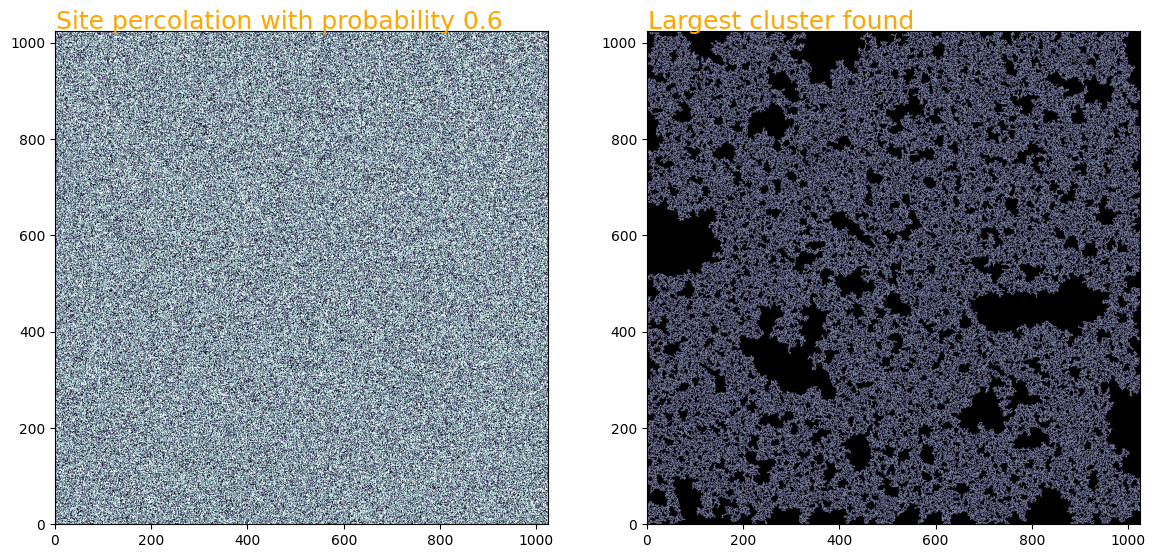

In [7]:
#@title Plot percolation { run: "auto" }

import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib import cm

from IPython import display
from time import sleep

# Parameters
N1, N2 = 1024, 1024 #height, width
# occupation probability
probability = 0.6 #@param {type:"slider", min:0, max:1, step:0.01}
#initial conditions of zero
world = np.zeros((N1,N2))

world = run_percolation(world,probability) #run model

# Set up the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.set_ylim(0,N1)
ax1.set_xlim(0,N2)
ax2.set_ylim(0,N1)
ax2.set_xlim(0,N2)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

#filter largest cluster
structure = [[0,1,0],[1,1,1],[0,1,0]] #define connection
structure = [[1,0,1],[0,1,0],[1,0,1]] #define connection
label_world, nb_labels = ndimage.label(world,structure) #label clusters
sizes = ndimage.sum(world, label_world, range(nb_labels + 1)) # Get sizes of clusters

print(f"Largest cluster {sizes.max()}")
mask = sizes >= sizes.max()
binary_img = mask[label_world]

# Plot the world
ax1.imshow((world), cmap=plt.get_cmap(cm.bone), origin = 'lower')
ax2.imshow(binary_img, cmap=plt.get_cmap(cm.bone), origin = 'lower')

# Add label
ax1.text(2, N1+5, f'Site percolation with probability {probability}', color='Orange', fontsize=18)
ax2.text(2, N1+5, f'Largest cluster found', color='Orange', fontsize=18)
plt.show()